<a href="https://colab.research.google.com/github/BrianJett/Gold-Standard-Pipeline-Guide/blob/main/Machine_Learning_Week_3c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
 24418621-565E-416E-9DA5-8E4527734A5E.jpeg
'ACFrOgA124Y9G0XhSnN7s60eLSm8vmkFU_O1xKogsskN9EwY24wxqd3VT06vARi8P-ga8cu0ikclvlnWsLEMDn56-D-3NZKhv3ONgEKqWGBo0YVymmNFInfF1V5Tln0=.pdf'
'B Jett passport 2023.pdf'
 Brian_Jett.jpg
 Brian_Jett_PGN_Application.pdf
'Call with Ben Mark .gdoc'
'Case Arguments.gdoc'
 CBA0B83F-965E-4C11-9B81-1E0D7E2ECA67.jpeg
'CMN 111 Intro .gdoc'
'Colab Notebooks'
'Copy of 4 Stress Test for Teens.doc.gdoc'
'Copy of chain of infection worksheet.gdoc'
'Copy of Health Behavior Contract 2018 EXERCISE.gdoc'
'Copy of Health Behavior Contract 2018 NUTRITION.gdoc'
'Copy of Health Behavior Contract 2018 SLEEP.gdoc'
'Copy of Health Behavior Contract week 1.gdoc'
'Copy of Health Behavior Contract Week 2.gdoc'
'Copy of How to live to be 100+.gdoc'
'Copy of Me Tree.gslides'
'Copy of Neglected Heart Parts 123 OL2014.docx.gdoc'
'Copy of Opening Health Paper NV.gdoc'
'Copy of Post-Test Food Diary FALL 2016 .gdoc'
'Copy of Recruit Information Sheet.gdoc'
'Cop

In [3]:
!pip install sparse_lmm

In [6]:
clinical_data = pd.read_csv('TCGA/TCGA_Head_and_Neck_Cancer_(HNSC)/TCGA.HNSC.sampleMap_HNSC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA/TCGA_Head_and_Neck_Cancer_(HNSC)/TCGA.HNSC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)
clinical_data.columns.to_list()

['_INTEGRATION',
 '_PANCAN_CNA_PANCAN_K8',
 '_PANCAN_Cluster_Cluster_PANCAN',
 '_PANCAN_DNAMethyl_HNSC',
 '_PANCAN_DNAMethyl_PANCAN',
 '_PANCAN_RPPA_PANCAN_K8',
 '_PANCAN_UNC_RNAseq_PANCAN_K16',
 '_PANCAN_miRNA_PANCAN',
 '_PANCAN_mirna_HNSC',
 '_PANCAN_mutation_PANCAN',
 '_PATIENT',
 '_cohort',
 '_primary_disease',
 '_primary_site',
 'additional_pharmaceutical_therapy',
 'additional_radiation_therapy',
 'additional_surgery_locoregional_procedure',
 'additional_surgery_metastatic_procedure',
 'age_at_initial_pathologic_diagnosis',
 'alcohol_history_documented',
 'amount_of_alcohol_consumption_per_day',
 'anatomic_neoplasm_subdivision',
 'bcr_followup_barcode',
 'bcr_patient_barcode',
 'bcr_sample_barcode',
 'clinical_M',
 'clinical_N',
 'clinical_T',
 'clinical_stage',
 'days_to_additional_surgery_locoregional_procedure',
 'days_to_additional_surgery_metastatic_procedure',
 'days_to_birth',
 'days_to_collection',
 'days_to_completion_of_curative_tx',
 'days_to_death',
 'days_to_initial_

In [10]:
gene_fullname = "TP53 Gene"
gene = "tp53"
trait = 'Head and Neck Cancer'
condition = 'Obesity'
condition_col = 'initial_weight'
gene_list = gene_data.index.tolist()
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 131 features, and the gene dataset includes 20530 genes


In [11]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_HNSC,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_HNSC,_PANCAN_mutation_PANCAN,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,TCGA-4P-AA8J-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.409822,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988
TCGA-BA-4074-01,TCGA-BA-4074-01,Squamous,C2-Squamous-like,cluster 3,Cluster 14 (HNSC),squamous c3,squamous-like c4,miRNA cluster 4,cluster 4,mutation cluster 5,...,-0.748878,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988
TCGA-BA-4075-01,TCGA-BA-4075-01,High,C2-Squamous-like,NaN,Cluster 14 (HNSC),NaN,squamous-like c4,NaN,NaN,mutation cluster 8,...,-0.129678,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788
TCGA-BA-4076-01,TCGA-BA-4076-01,Squamous,C2-Squamous-like,cluster 4,Cluster 14 (HNSC),NaN,squamous-like c4,miRNA cluster 11,cluster 2,mutation cluster 8,...,-0.140378,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812
TCGA-BA-4077-01,TCGA-BA-4077-01,Squamous,C2-Squamous-like,cluster 4,Cluster 13 (HNSC-LUSC),NaN,squamous-like c4,miRNA cluster 11,cluster 4,mutation cluster 4,...,-0.748878,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688


In [12]:
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,0.0,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,0.409822,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988
TCGA-BA-4074-01,0.0,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-0.748878,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988
TCGA-BA-4075-01,0.0,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-0.129678,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788
TCGA-BA-4076-01,0.0,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-0.140378,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812
TCGA-BA-4077-01,0.0,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-0.748878,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688


In [13]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Head and Neck Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,0.0,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988,1
TCGA-BA-4074-01,0.0,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988,1
TCGA-BA-4075-01,0.0,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788,1
TCGA-BA-4076-01,0.0,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812,1
TCGA-BA-4077-01,0.0,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688,1


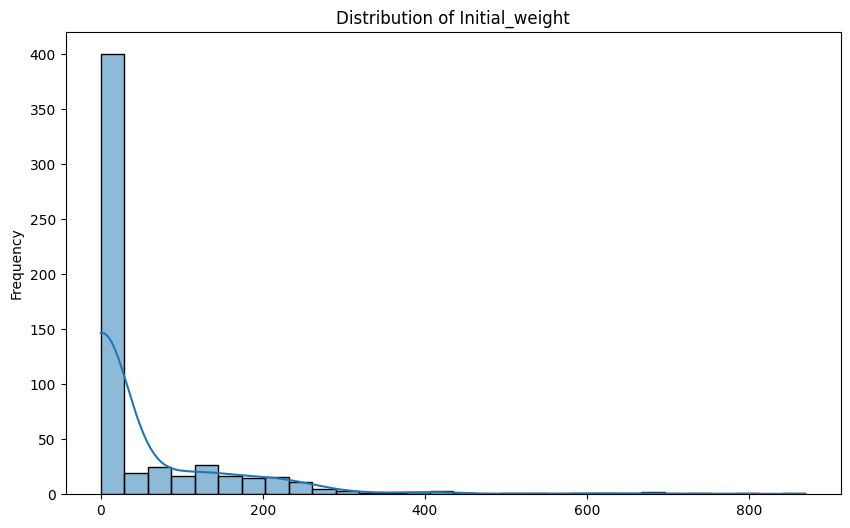

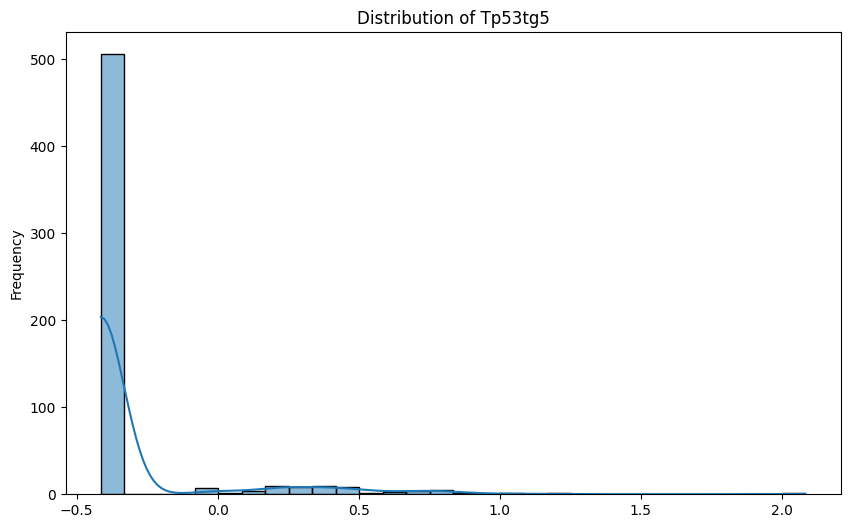

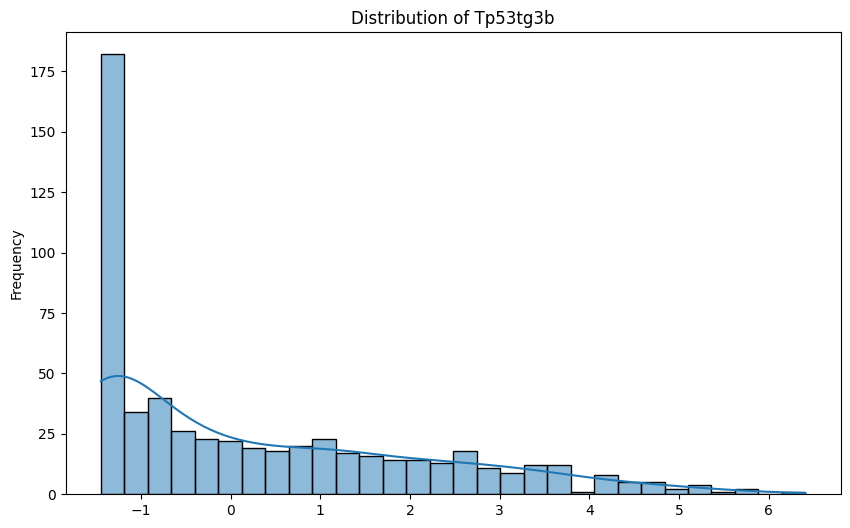

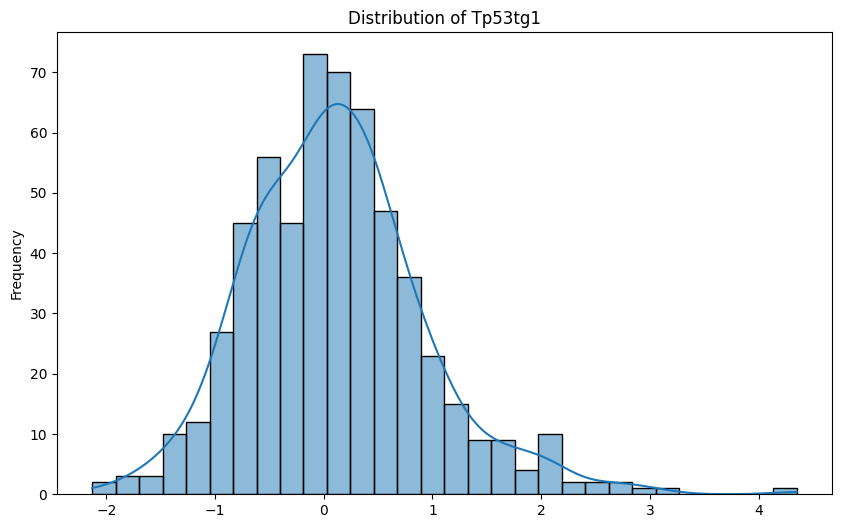

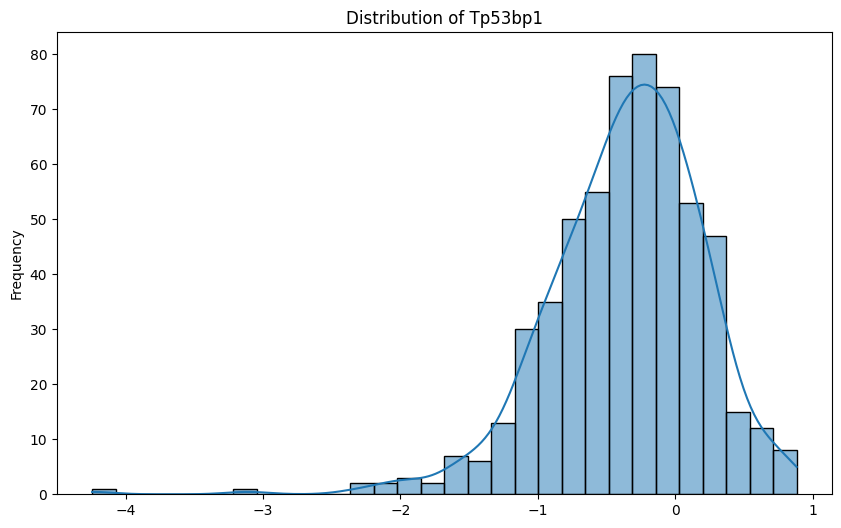

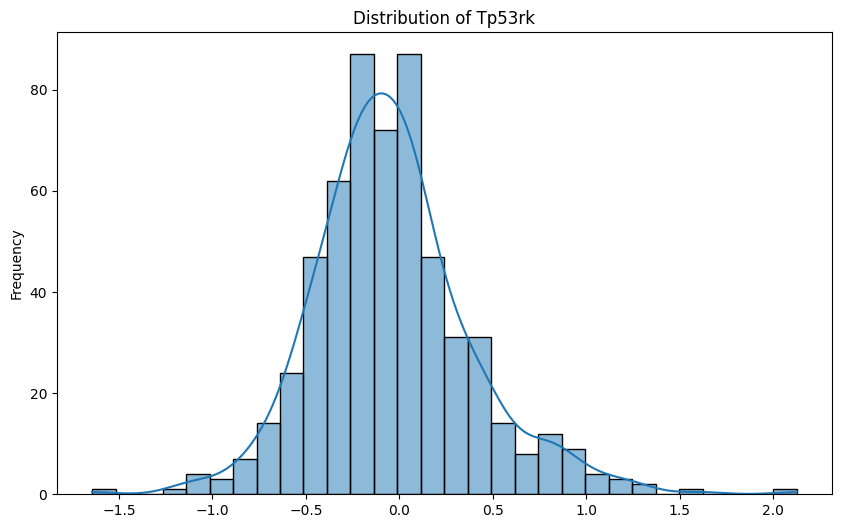

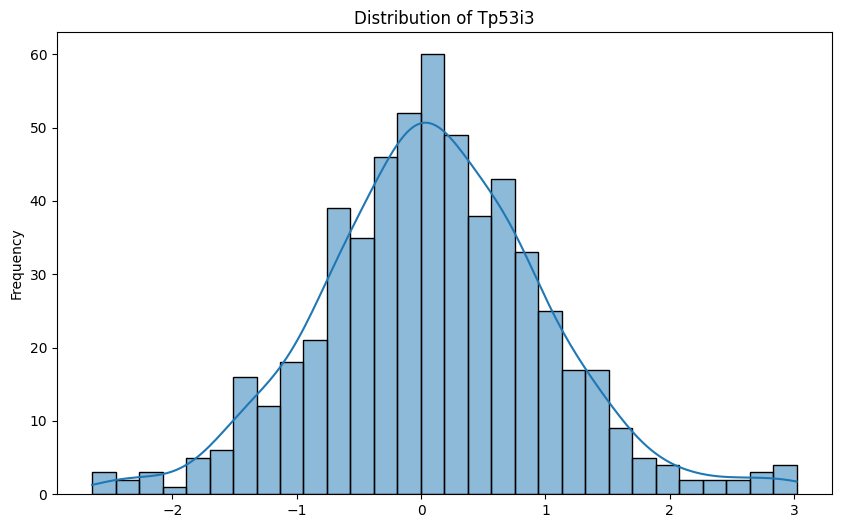

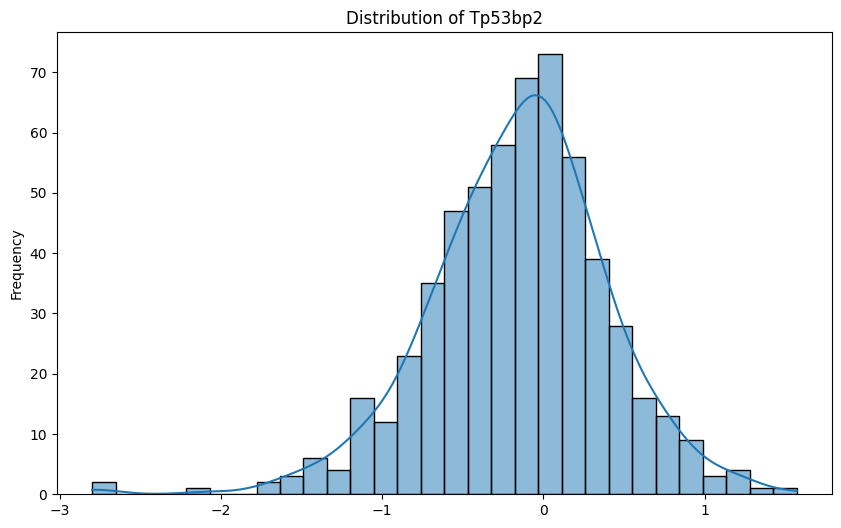

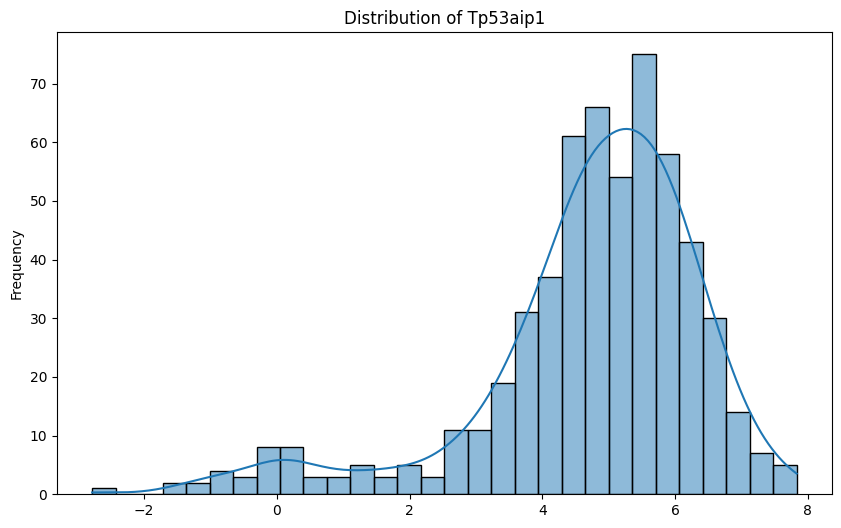

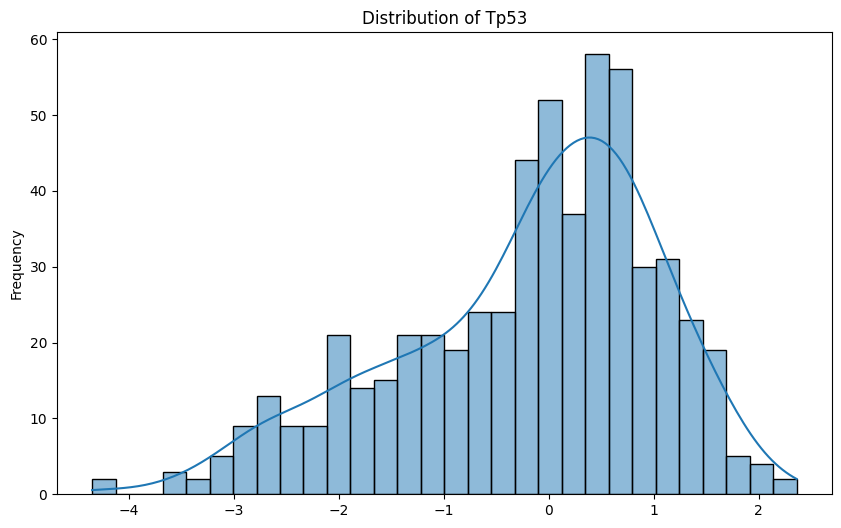

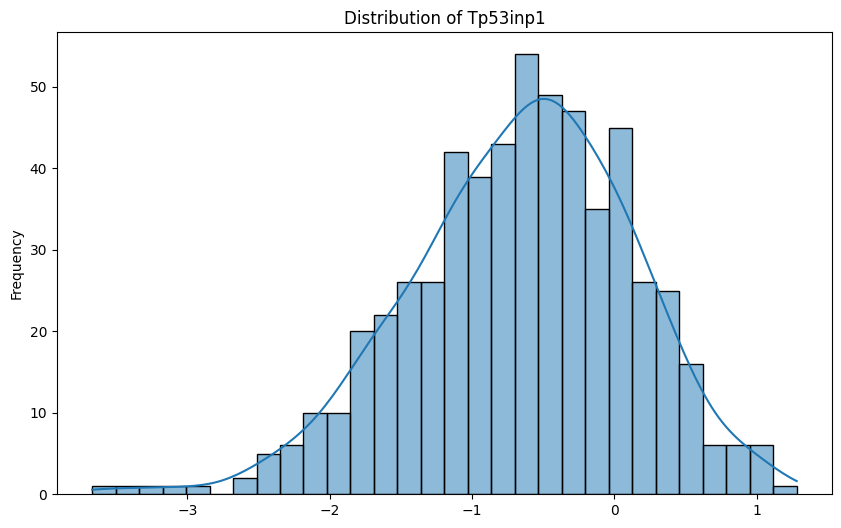

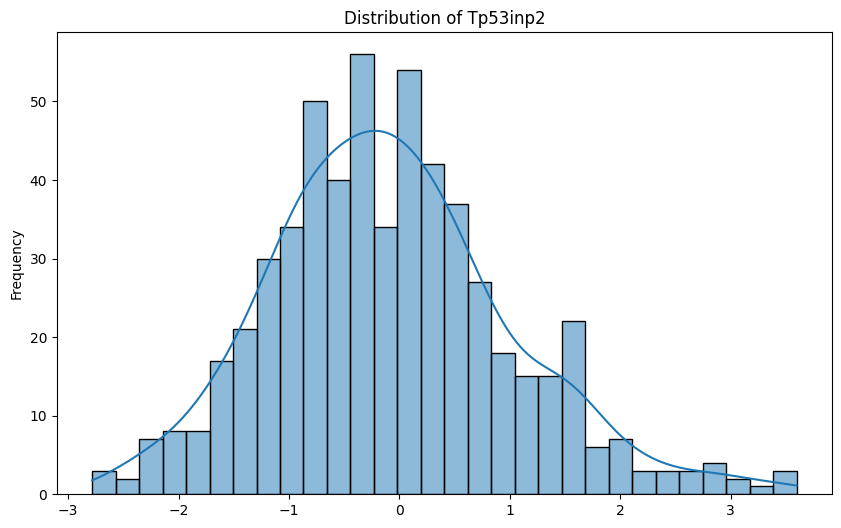

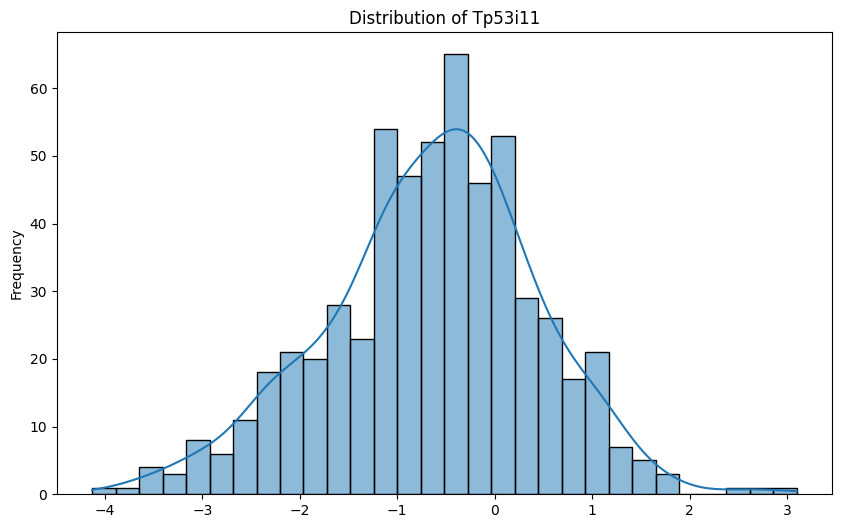

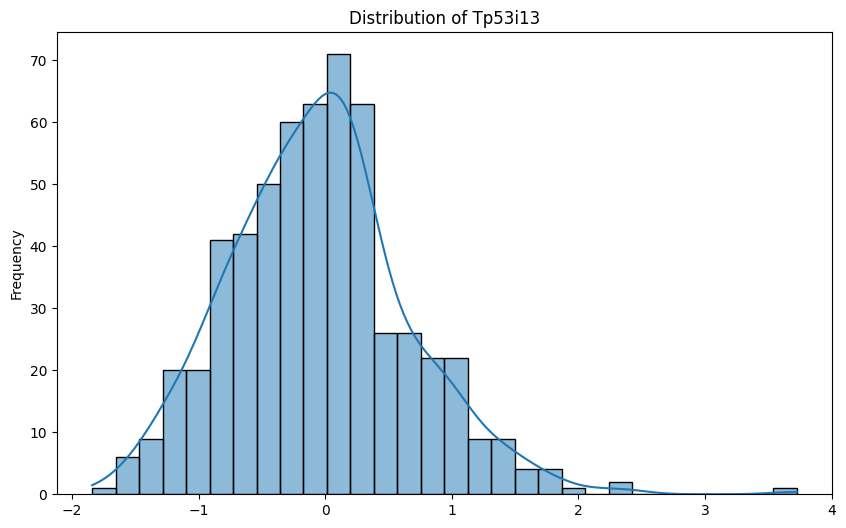

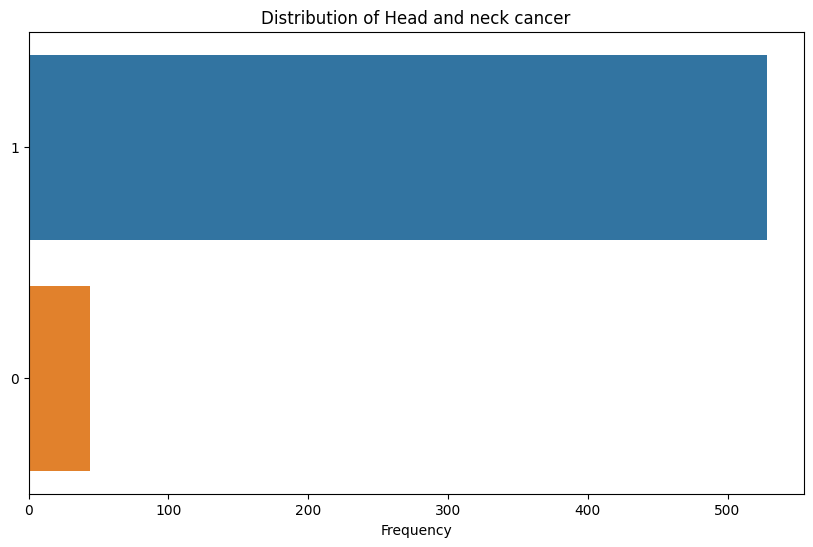

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)
interested_genes = [col for col in gene_list if 'tp53' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])

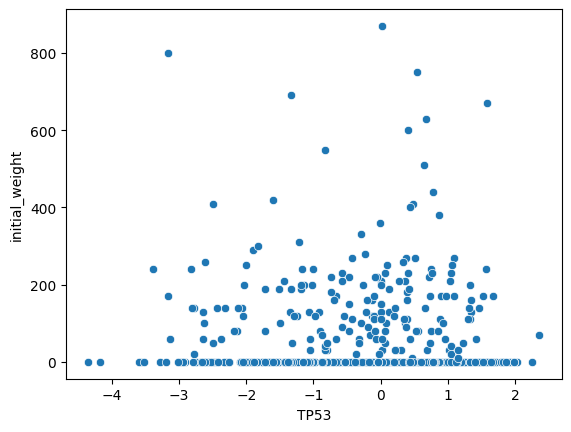

In [15]:
sns.scatterplot(data=merged_data, x='TP53', y=condition_col)
plt.show()

In [16]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [17]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        X_train, X_test = preprocess_data(X_train, X_test)
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)
        binary_predictions = (predictions > 0.5).astype(int)
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-16-0fccbbd2148b>:8: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-16-0fccbbd2148b>:13: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 70.43% ± 3.54%


In [18]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
var_select.fit(X, y)
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-16-0fccbbd2148b>:8: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [20]:
import pandas as pd
from statsmodels.stats.multitest import multipletests
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})
condition_effect = regression_df.iloc[0]
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: Obesity
Coefficient: 0.0053
p-value: 0.4026



In [21]:
threshold = 0.05
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait Head and Neck Cancer conditional on the factor Obesity, sorted by corrected p-value:
 Variable  Coefficient  corrected_p_value
    TRYX3    -0.033434           0.000553
   ADAM12     0.078955           0.002436
    CIDEC    -0.040057           0.003498
     NID2     0.092349           0.003498
   COL4A1     0.075192           0.009308
   ZNF114     0.043995           0.009308
  PLA2G2E    -0.026754           0.009308
     HTN3    -0.033432           0.013553
C14orf180    -0.040439           0.013553
     ESM1     0.041085           0.013553
     DPF1     0.046775           0.018118
   COL5A2     0.074174           0.020222
 DEFB105A     0.025758           0.022170
     GDF2    -0.027738           0.031376
    MUC21     0.044512           0.032950
    PLIN1    -0.036457           0.033392
     APOF    -0.029305           0.039507
  FAM74A3    -0.021868           0.039507
   COL6A3     0.077234           0.041090
     DIO1    -0.03